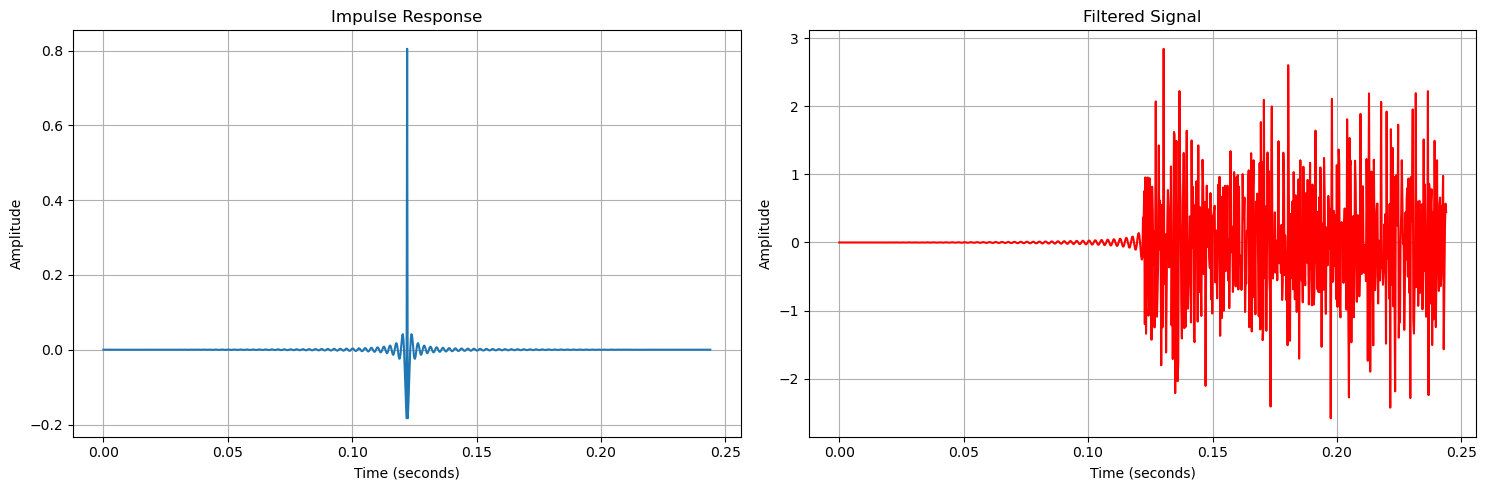

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
fs = 4096      # sampling frequency

# Generate impulse
impulse = np.zeros(1000)
impulse[0] = 1

# Design FIR filter
cutoff_freq = 400  # Hz
nyquist = fs / 2
normalized_cutoff_freq = cutoff_freq / nyquist
num_taps = 1001     # Filter order + 1
# high pass
fir_coeffs = signal.firwin(num_taps, normalized_cutoff_freq, window='hamming', pass_zero = False)

# Get impulse response
impulse_response = signal.lfilter(fir_coeffs, [1.0], impulse)

# Generate filtered noise with same length as impulse
wgn = np.random.normal(0, 1, len(impulse))
filtered_signal = signal.lfilter(fir_coeffs, [1.0], wgn)

# Create time vector
time_vector = np.arange(len(impulse_response))/fs

# Create plots
plt.figure(figsize=(15, 5))

# Plot impulse response
plt.subplot(1, 2, 1)
plt.plot(time_vector, impulse_response)
plt.title('Impulse Response')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot filtered signal
plt.subplot(1, 2, 2)
plt.plot(time_vector, filtered_signal, 'r-')
plt.title('Filtered Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

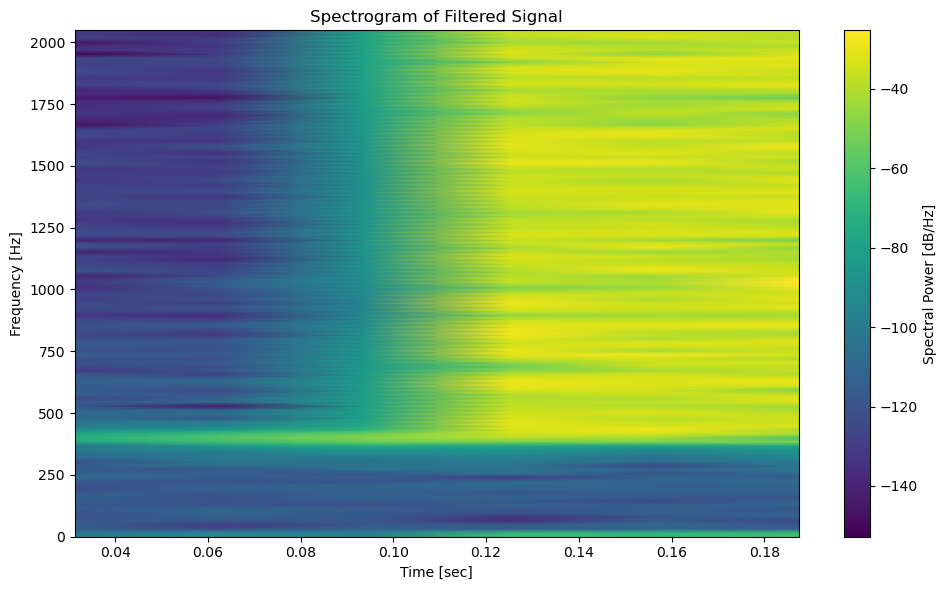

In [2]:
# Create spectrogram of the filtered signal
plt.figure(figsize=(10, 6))
f, t, Sxx = signal.spectrogram(filtered_signal, 
                              fs=fs,
                              window='hann',
                              nperseg=256,
                              noverlap=128,
                              scaling='density')

plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Filtered Signal')
plt.colorbar(label='Spectral Power [dB/Hz]')
plt.ylim([0, fs/2])  # Limit to Nyquist frequency
plt.tight_layout()
plt.show()

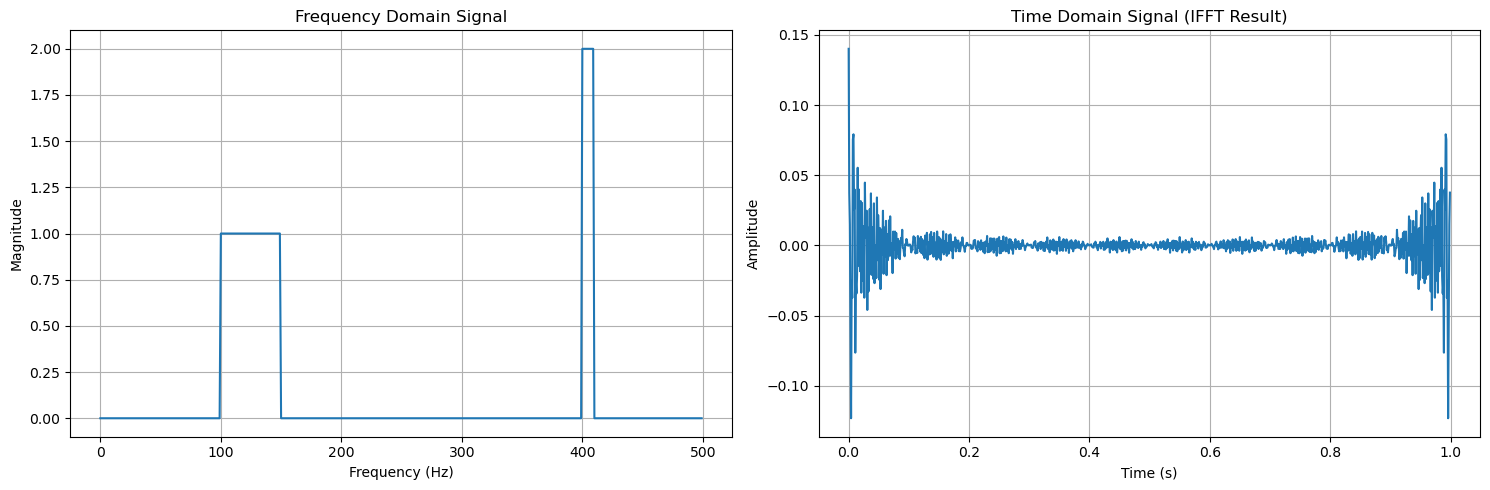

Peak amplitude in time domain: 0.140
Number of zero crossings: 648


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # number of points
fs = 1000  # sampling frequency for time domain interpretation

# Create frequency domain signal with sharp features
freq_domain = np.zeros(N, dtype=complex)
# Add sharp rectangular feature
freq_domain[100:150] = 1.0  # Sharp rectangular pulse in frequency domain
# Add another sharp feature
freq_domain[400:410] = 2.0  # Narrower, taller pulse

# Ensure conjugate symmetry for real output
freq_domain[N//2+1:] = np.conj(np.flip(freq_domain[1:N//2]))

# Compute IFFT
time_domain = np.fft.ifft(freq_domain)
time_domain = np.real(time_domain)  # Take real part since signal should be real

# Create frequency axis for plotting
freq_axis = np.fft.fftfreq(N, d=1/fs)

# Plot results
plt.figure(figsize=(15, 5))

# Plot frequency domain signal
plt.subplot(1, 2, 1)
plt.plot(freq_axis[:N//2], np.abs(freq_domain[:N//2]))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot time domain signal
plt.subplot(1, 2, 2)
time_axis = np.arange(N)/fs
plt.plot(time_axis, time_domain)
plt.title('Time Domain Signal (IFFT Result)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print some statistics about the ringing
print(f"Peak amplitude in time domain: {np.max(np.abs(time_domain)):.3f}")
print(f"Number of zero crossings: {np.sum(np.diff(np.signbit(time_domain)))}")